In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('AmesHousing.csv')
print(data.head(3))


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  

[3 rows x 82 columns]


In [8]:
x = data['Gr Liv Area'].values
y = data['SalePrice'].values

x_mean = np.mean(x)
y_mean = np.mean(y)
print(f'x mean: {x}')
print(f'y mean: {y}')

x mean: [1656  896 1329 ...  970 1389 2000]
y mean: [215000 105000 172000 ... 132000 170000 188000]


In [9]:
numerator = 0
denominator = 0
for i in range(len(x)):
    numerator += (x[i] - x_mean) * (y[i] - y_mean)
    denominator += (x[i] - x_mean) ** 2
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
print(f'Slope (b1):{b1}')
print(f'Intercept (b0): {b0}')


Slope (b1):111.69400085780009
Intercept (b0): 13289.634364759957


In [10]:
y_pred = b0 + b1 * x
print(y_pred)

[198254.89978528 113367.45913335 161730.96150478 ... 121632.81519683
 168432.60155624 236677.63608036]


In [11]:
mse = np.mean(y - y_pred ** 2)
ss_tot = np.sum((y - y_mean) ** 2)
ss_res = np.sum((y - y_pred) ** 2)
r2_score = 1 - (ss_res / ss_tot)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2_score}')

Mean Squared Error: -35873938951.17299
R^2 Score: 0.49953785669572837


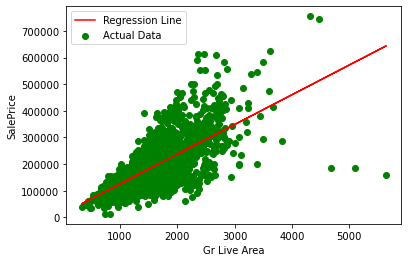

In [12]:
plt.scatter(x, y, color='green', label='Actual Data')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel('Gr Live Area')
plt.ylabel('SalePrice')
plt.legend()
plt.show()